# Airlines Delay Causes

a. What is the percentage of delayed air carrier for every months? 

b. What is the percentage of on time air carrier every month? 

c. What is the percentage of the air carrier delay caused by weather for every month? 

d. Which carrier has the most number of flight for every month? 

e. Which airport has the most number of landed air carrier every month?

# Data Reading and Calculating

In [1]:
# Reading Data
import pandas as pd

# Math functions
import numpy as np
import matplotlib as mpl

#Fixings warnings
import warnings 
warnings.filterwarnings('ignore')

# Visualization functions
import seaborn as sns 
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
airline_delay = pd.read_csv("Airline_Delay_Cause (1).csv")
airline_delay

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,9,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",80.0,6.0,2.72,0.00,...,0.0,0.00,0.0,0.0,308.0,163.0,0.0,145.0,0.0,0.0
1,2023,9,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",60.0,6.0,2.93,0.00,...,0.0,1.91,0.0,1.0,341.0,222.0,0.0,49.0,0.0,70.0
2,2023,9,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",60.0,4.0,3.00,0.00,...,0.0,0.00,0.0,0.0,147.0,128.0,0.0,19.0,0.0,0.0
3,2023,9,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",92.0,7.0,2.93,0.94,...,0.0,1.00,0.0,0.0,270.0,112.0,48.0,42.0,0.0,68.0
4,2023,9,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",72.0,14.0,5.56,0.00,...,0.0,6.35,6.0,0.0,695.0,220.0,0.0,137.0,0.0,338.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13944,2023,1,YX,Republic Airline,STL,"St. Louis, MO: St Louis Lambert International",279.0,31.0,7.44,0.00,...,0.0,13.00,3.0,0.0,1775.0,258.0,0.0,704.0,0.0,813.0
13945,2023,1,YX,Republic Airline,SYR,"Syracuse, NY: Syracuse Hancock International",177.0,30.0,7.70,2.80,...,0.0,9.02,4.0,0.0,1600.0,458.0,134.0,369.0,0.0,639.0
13946,2023,1,YX,Republic Airline,TPA,"Tampa, FL: Tampa International",6.0,0.0,0.00,0.00,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13947,2023,1,YX,Republic Airline,TUL,"Tulsa, OK: Tulsa International",53.0,15.0,2.02,1.27,...,0.0,5.07,0.0,0.0,1347.0,79.0,50.0,292.0,0.0,926.0


In [3]:
import pandas as pd
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Use the Mako color palette for background gradient
styled_description = airline_delay.describe().style.background_gradient(cmap='mako')

# Display the styled output
styled_description


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,13949.000000,13949.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000,13931.000000
mean,2023.000000,5.019141,367.149523,80.985787,27.133951,2.912675,20.852194,0.245860,29.841151,5.934534,1.007752,5729.492642,2045.203072,307.163377,1059.799943,11.532769,2305.793482
std,0.000000,2.583921,1015.590197,218.422877,64.543189,9.243501,63.661469,0.955827,92.299681,22.340985,4.307135,17673.111258,6328.188793,1035.855302,3588.803226,50.193011,7823.431672
min,2023.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.000000,3.000000,51.000000,8.000000,2.900000,0.000000,1.000000,0.000000,1.860000,0.000000,0.000000,449.500000,148.000000,0.000000,33.000000,0.000000,96.000000
50%,2023.000000,5.000000,96.000000,20.000000,8.000000,0.840000,4.000000,0.000000,5.980000,1.000000,0.000000,1305.000000,478.000000,40.000000,164.000000,0.000000,402.000000
75%,2023.000000,7.000000,250.000000,57.000000,22.710000,2.275000,12.730000,0.000000,19.140000,4.000000,1.000000,3781.500000,1517.000000,214.000000,566.000000,0.000000,1463.000000
max,2023.000000,9.000000,20084.000000,4142.000000,1293.910000,266.420000,1068.200000,24.460000,2069.070000,584.000000,125.000000,438783.000000,162563.000000,25206.000000,72056.000000,1477.000000,227959.000000


In [4]:
# Reading Data
import pandas as pd

# Math functions
import numpy as np
import matplotlib.pyplot as plt

# Fixing warnings
import warnings 
warnings.filterwarnings('ignore')

# Visualization functions
import seaborn as sns 
import plotly.express as px
from termcolor import colored
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Load the dataset
airline_delay = pd.read_csv("Airline_Delay_Cause (1).csv")

# Display the first few rows of the dataset to understand its structure
print(airline_delay.head())

# Explore the dataset to understand column names and data types
print(airline_delay.info())

# a. Percentage of Delayed Air Carrier for Every Month
airline_delay['percentage_delayed'] = (airline_delay['arr_del15'] / airline_delay['arr_flights']) * 100

# b. Percentage of On-Time Air Carrier Every Month
airline_delay['percentage_on_time'] = 100 - airline_delay['percentage_delayed']

# c. Percentage of Air Carrier Delay Caused by Weather for Every Month
airline_delay['percentage_weather_delay'] = (airline_delay['weather_delay'] / airline_delay['arr_delay']) * 100

# d. Carrier with the Most Number of Flights for Every Month
max_flights_carrier = airline_delay.groupby(['year', 'month', 'carrier'])['arr_flights'].max().reset_index()
max_flights_carrier = max_flights_carrier.loc[max_flights_carrier.groupby(['year', 'month'])['arr_flights'].idxmax()]

# e. Airport with the Most Number of Landed Air Carrier Every Month
max_landed_airport = airline_delay.groupby(['year', 'month', 'airport'])['arr_flights'].max().reset_index()
max_landed_airport = max_landed_airport.loc[max_landed_airport.groupby(['year', 'month'])['arr_flights'].idxmax()]

# Display the results
print("\na. Percentage of Delayed Air Carrier for Every Month:")
print(airline_delay[['year', 'month', 'carrier', 'percentage_delayed']])

print("\nb. Percentage of On-Time Air Carrier Every Month:")
print(airline_delay[['year', 'month', 'carrier', 'percentage_on_time']])

print("\nc. Percentage of Air Carrier Delay Caused by Weather for Every Month:")
print(airline_delay[['year', 'month', 'carrier', 'percentage_weather_delay']])

print("\nd. Carrier with the Most Number of Flights for Every Month:")
print(max_flights_carrier[['year', 'month', 'carrier', 'arr_flights']])

print("\ne. Airport with the Most Number of Landed Air Carrier Every Month:")
print(max_landed_airport[['year', 'month', 'airport', 'arr_flights']])


   year  month carrier       carrier_name airport  \
0  2023      9      9E  Endeavor Air Inc.     ABE   
1  2023      9      9E  Endeavor Air Inc.     ABY   
2  2023      9      9E  Endeavor Air Inc.     AEX   
3  2023      9      9E  Endeavor Air Inc.     AGS   
4  2023      9      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         80.0        6.0   
1             Albany, GA: Southwest Georgia Regional         60.0        6.0   
2           Alexandria, LA: Alexandria International         60.0        4.0   
3        Augusta, GA: Augusta Regional at Bush Field         92.0        7.0   
4                   Albany, NY: Albany International         72.0       14.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.72        0.00  ...          0.0              0.00            0.0   
1        2.93        0.00  ...          

# Percentage of Delayed Air Carrier

Carrier Delayed

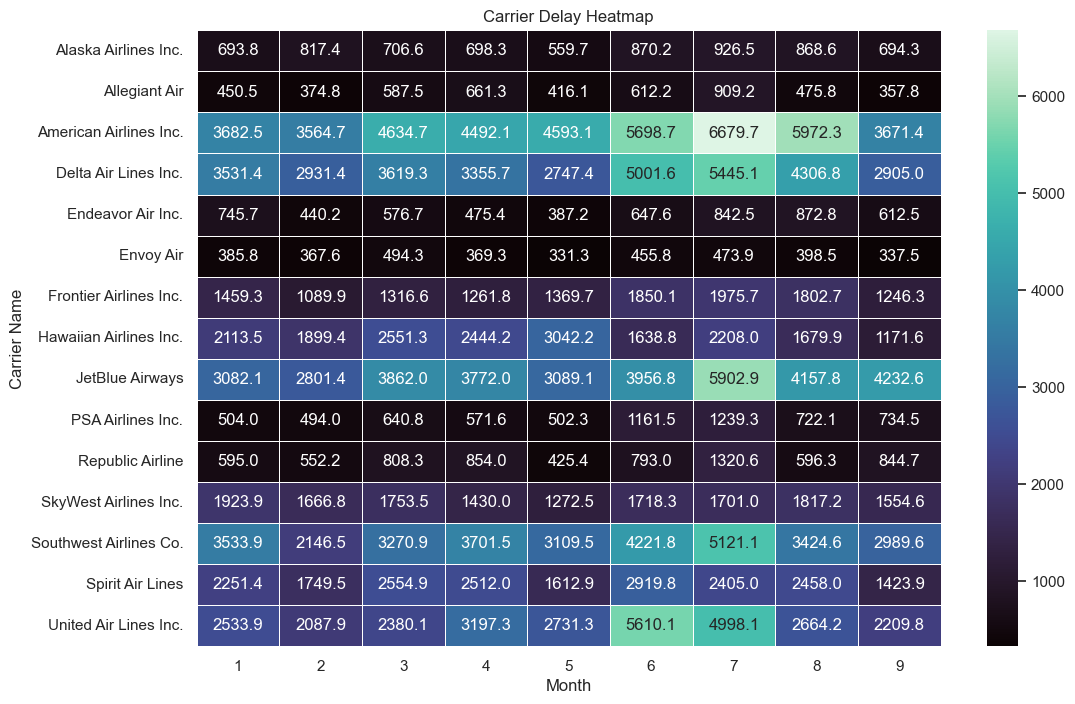

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Aggregate values (using mean in this case) for duplicate entries
heatmap_data = airline_delay.groupby(['carrier_name', 'month']).agg({'carrier_delay': 'mean'}).reset_index()
heatmap_data_pivot = heatmap_data.pivot(index='carrier_name', columns='month', values='carrier_delay')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_pivot, cmap='mako', annot=True, fmt=".1f", linewidths=.5)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Carrier Name')
plt.title('Carrier Delay Heatmap')

# Show the plot
plt.show()


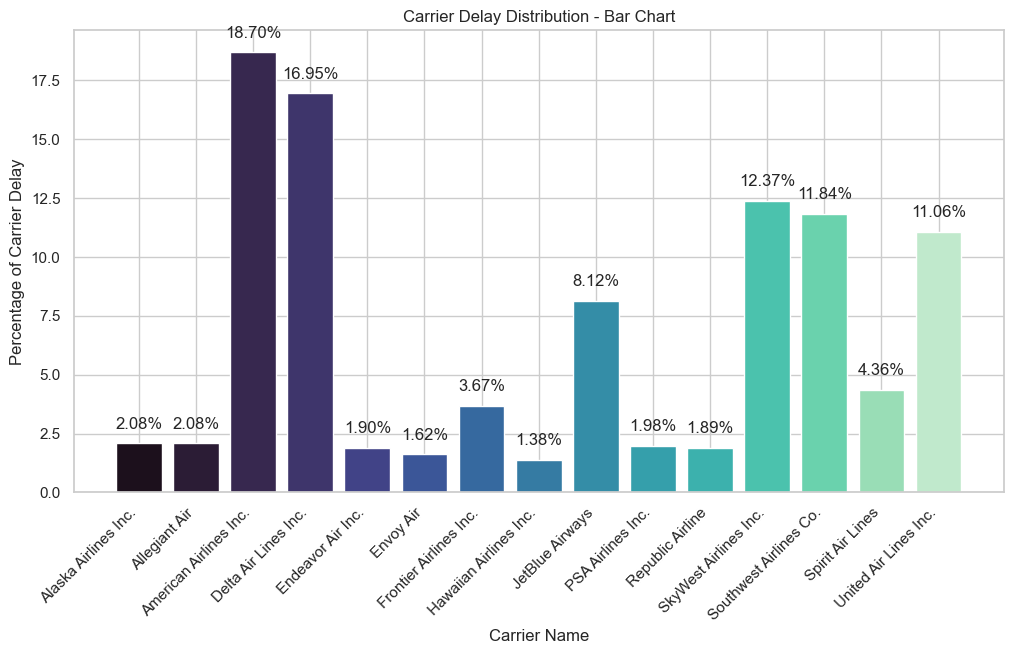

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Aggregate values (using sum in this case) for duplicate entries
carrier_delay_sum = airline_delay.groupby('carrier_name')['carrier_delay'].sum()

# Calculate percentage values
percentage_values = carrier_delay_sum / carrier_delay_sum.sum() * 100

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar chart
plt.figure(figsize=(12, 6))
colors = sns.color_palette("mako", len(percentage_values))
bar_plot = plt.bar(percentage_values.index, percentage_values, color=colors)
plt.xlabel('Carrier Name')
plt.ylabel('Percentage of Carrier Delay')
plt.title('Carrier Delay Distribution - Bar Chart')

# Show the values on the bars
for i, value in enumerate(percentage_values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


arr_del15

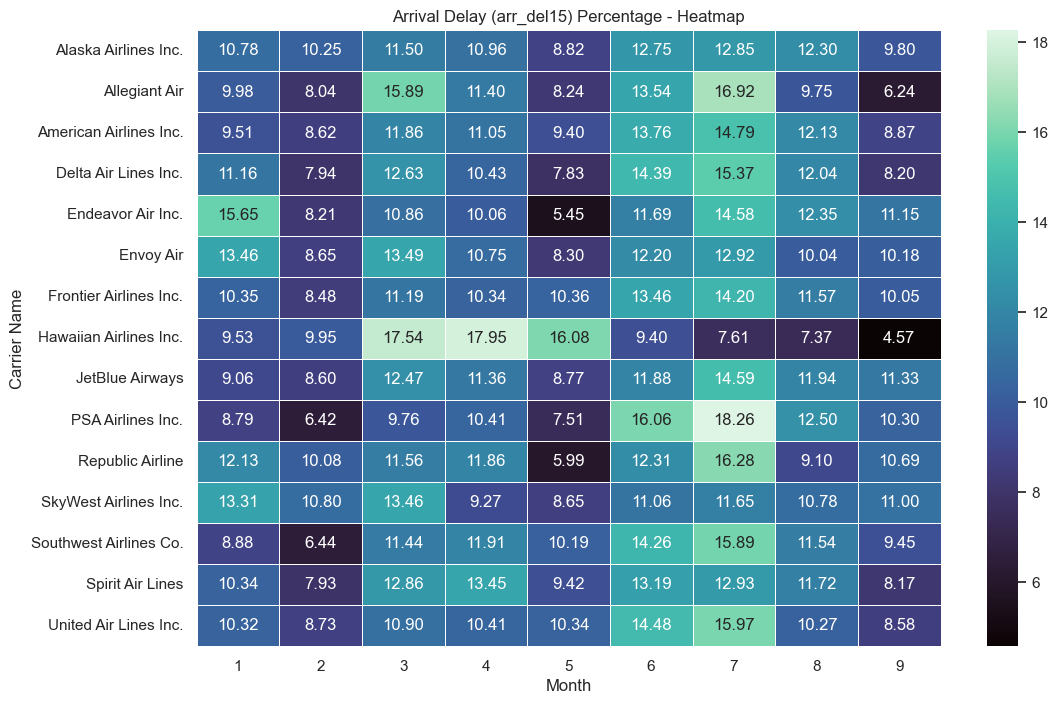

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Aggregate values for duplicate entries
arr_del15_sum = airline_delay.groupby(['carrier_name', 'month'])['arr_del15'].sum()

# Calculate percentage values
percentage_values_heatmap = arr_del15_sum / arr_del15_sum.groupby('carrier_name').transform('sum') * 100

# Pivot the data for heatmap
heatmap_data = percentage_values_heatmap.reset_index().pivot(index='carrier_name', columns='month', values='arr_del15')

# Set the style of seaborn
sns.set(style="whitegrid")

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='mako', annot=True, fmt=".2f", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Carrier Name')
plt.title('Arrival Delay (arr_del15) Percentage - Heatmap')

plt.show()


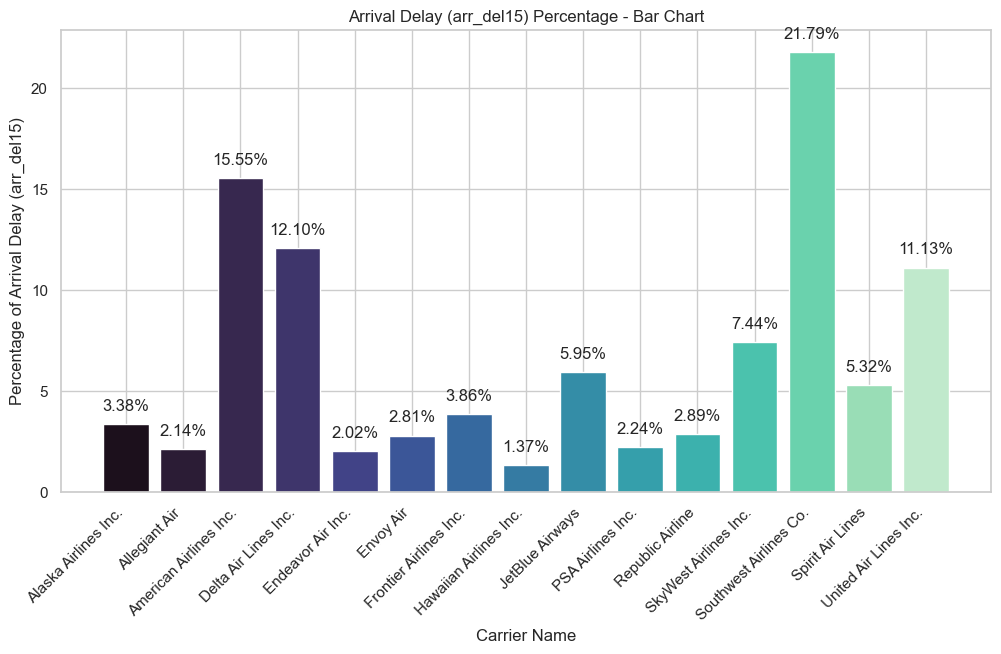

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Aggregate values for duplicate entries
arr_del15_sum = airline_delay.groupby('carrier_name')['arr_del15'].sum()

# Calculate percentage values
percentage_values_bar = arr_del15_sum / arr_del15_sum.sum() * 100

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar chart
plt.figure(figsize=(12, 6))
colors = sns.color_palette("mako", len(percentage_values_bar))
bar_plot = plt.bar(percentage_values_bar.index, percentage_values_bar, color=colors)
plt.xlabel('Carrier Name')
plt.ylabel('Percentage of Arrival Delay (arr_del15)')
plt.title('Arrival Delay (arr_del15) Percentage - Bar Chart')

# Show the values on the bars
for i, value in enumerate(percentage_values_bar):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


arr_flight

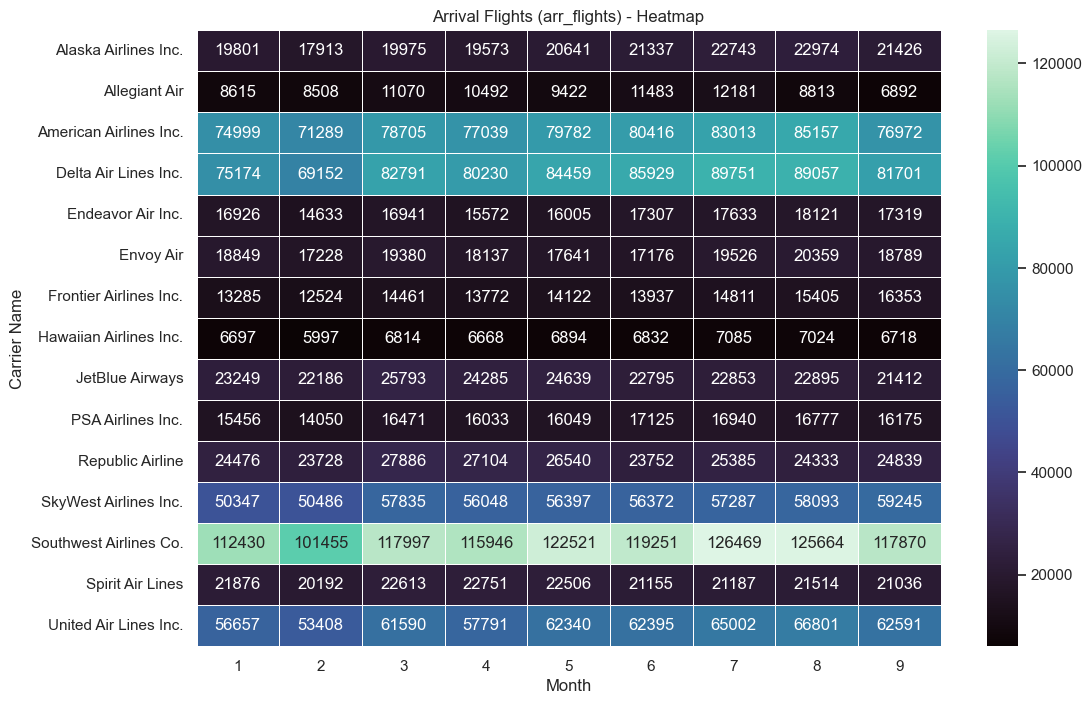

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Aggregate values for duplicate entries
arr_flights_sum = airline_delay.groupby(['carrier_name', 'month'])['arr_flights'].sum()

# Pivot the data for heatmap
heatmap_data_arr_flights = arr_flights_sum.reset_index().pivot(index='carrier_name', columns='month', values='arr_flights')

# Set the style of seaborn
sns.set(style="whitegrid")

# Heatmap for arr_flights
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_arr_flights, cmap='mako', annot=True, fmt=".0f", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Carrier Name')
plt.title('Arrival Flights (arr_flights) - Heatmap')

plt.show()


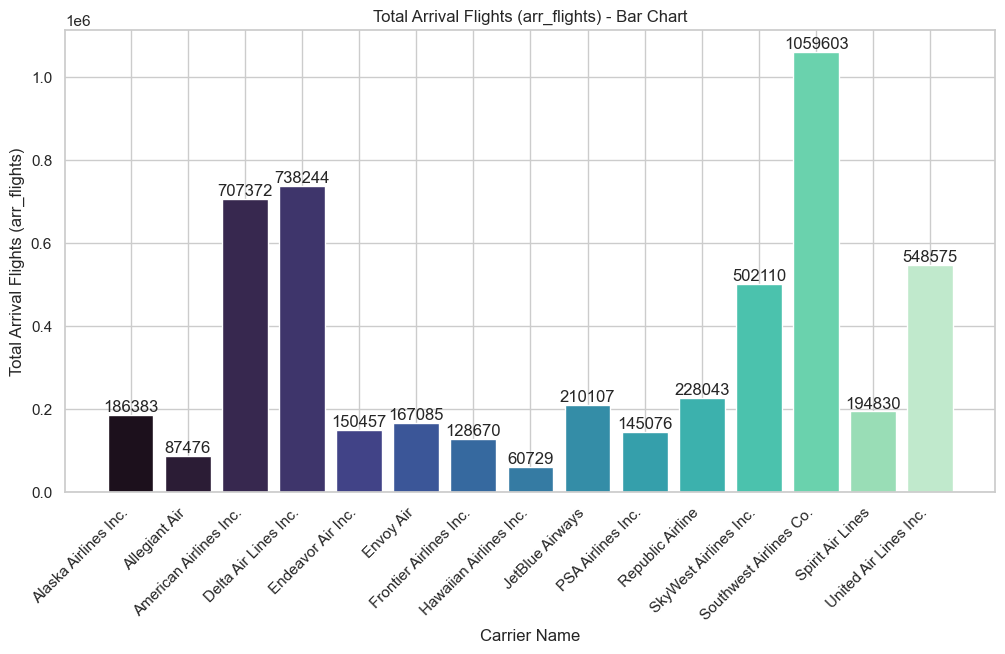

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Aggregate values for duplicate entries
arr_flights_sum = airline_delay.groupby('carrier_name')['arr_flights'].sum()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar chart for arr_flights
plt.figure(figsize=(12, 6))
colors = sns.color_palette("mako", len(arr_flights_sum))
bar_plot = plt.bar(arr_flights_sum.index, arr_flights_sum, color=colors)
plt.xlabel('Carrier Name')
plt.ylabel('Total Arrival Flights (arr_flights)')
plt.title('Total Arrival Flights (arr_flights) - Bar Chart')

# Show the values on the bars
for i, value in enumerate(arr_flights_sum):
    plt.text(i, value + 0.5, f'{value:.0f}', ha='center', va='bottom')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


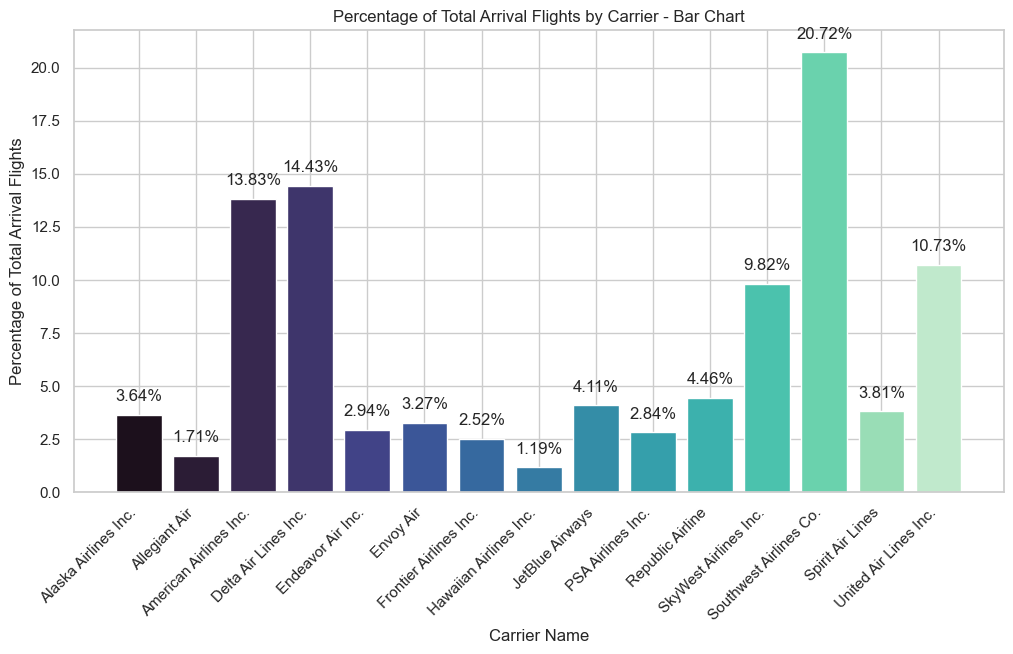

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Aggregate values for duplicate entries
arr_flights_sum = airline_delay.groupby('carrier_name')['arr_flights'].sum()

# Calculate the total number of arrival flights
total_arr_flights = arr_flights_sum.sum()

# Calculate the percentage of total arrival flights for each carrier
arr_flights_percent = (arr_flights_sum / total_arr_flights) * 100

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar chart for arrival flights as a percentage
plt.figure(figsize=(12, 6))
colors = sns.color_palette("mako", len(arr_flights_percent))
bar_plot = plt.bar(arr_flights_percent.index, arr_flights_percent, color=colors)
plt.xlabel('Carrier Name')
plt.ylabel('Percentage of Total Arrival Flights')
plt.title('Percentage of Total Arrival Flights by Carrier - Bar Chart')

# Show the percentage values on the bars
for i, value in enumerate(arr_flights_percent):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


carrier delay for every month

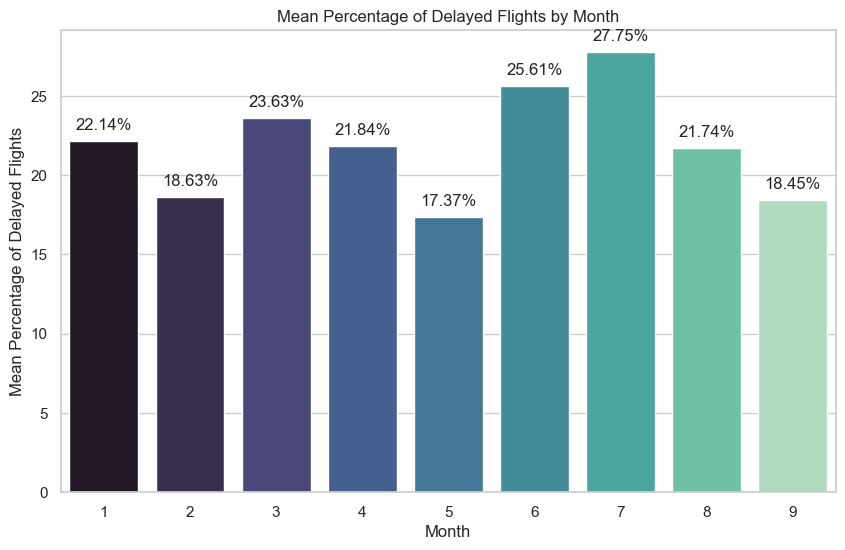

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Calculate the percentage of delayed flights
airline_delay['Percentage_Delayed'] = (airline_delay['arr_del15'] / airline_delay['arr_flights']) * 100

# Group by month and calculate the mean percentage of delayed flights for each month
monthly_percentage_delayed = airline_delay.groupby('month')['Percentage_Delayed'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar chart for mean percentage delayed flights by month
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='month', y='Percentage_Delayed', data=monthly_percentage_delayed, palette='mako')
plt.xlabel('Month')
plt.ylabel('Mean Percentage of Delayed Flights')
plt.title('Mean Percentage of Delayed Flights by Month')

# Display the values on top of each bar
for bar, value in zip(bar_plot.patches, monthly_percentage_delayed['Percentage_Delayed']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()


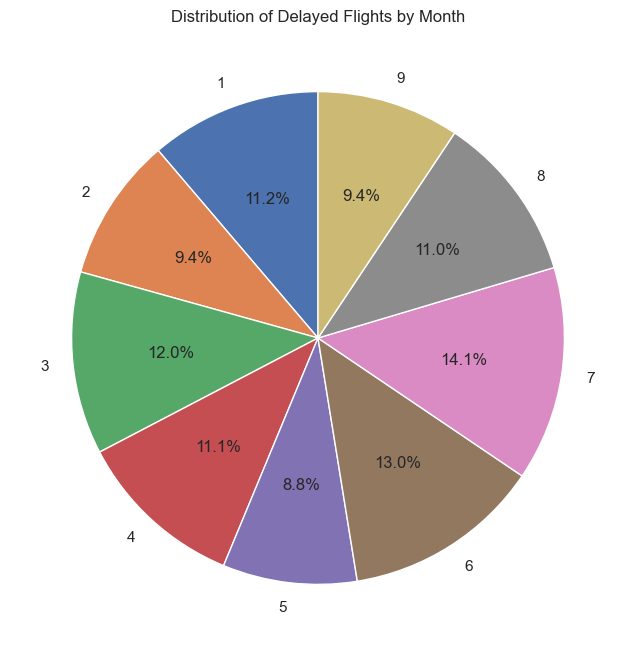

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Calculate the percentage of delayed flights
airline_delay['Percentage_Delayed'] = (airline_delay['arr_del15'] / airline_delay['arr_flights']) * 100

# Group by month and calculate the mean percentage of delayed flights for each month
monthly_percentage_delayed = airline_delay.groupby('month')['Percentage_Delayed'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a pie chart for the mean percentage of delayed flights by month
plt.figure(figsize=(8, 8))
plt.pie(monthly_percentage_delayed['Percentage_Delayed'], labels=monthly_percentage_delayed['month'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Delayed Flights by Month')
plt.show()


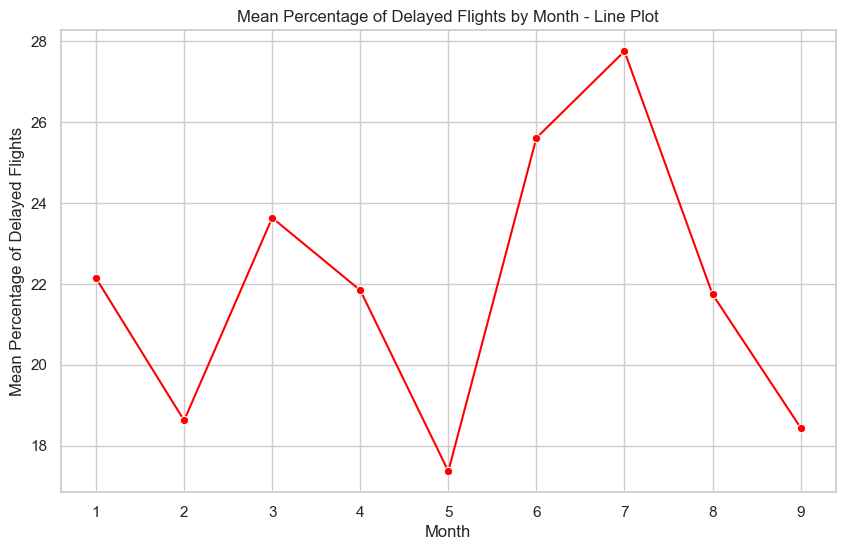

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Calculate the percentage of delayed flights
airline_delay['Percentage_Delayed'] = (airline_delay['arr_del15'] / airline_delay['arr_flights']) * 100

# Group by month and calculate the mean percentage of delayed flights for each month
monthly_percentage_delayed = airline_delay.groupby('month')['Percentage_Delayed'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a line plot for mean percentage delayed flights by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Percentage_Delayed', data=monthly_percentage_delayed, color='red', marker='o')
plt.xlabel('Month')
plt.ylabel('Mean Percentage of Delayed Flights')
plt.title('Mean Percentage of Delayed Flights by Month - Line Plot')

plt.show()


# Percentage of On-Time Air Carrier Every Month

Arr_Flight

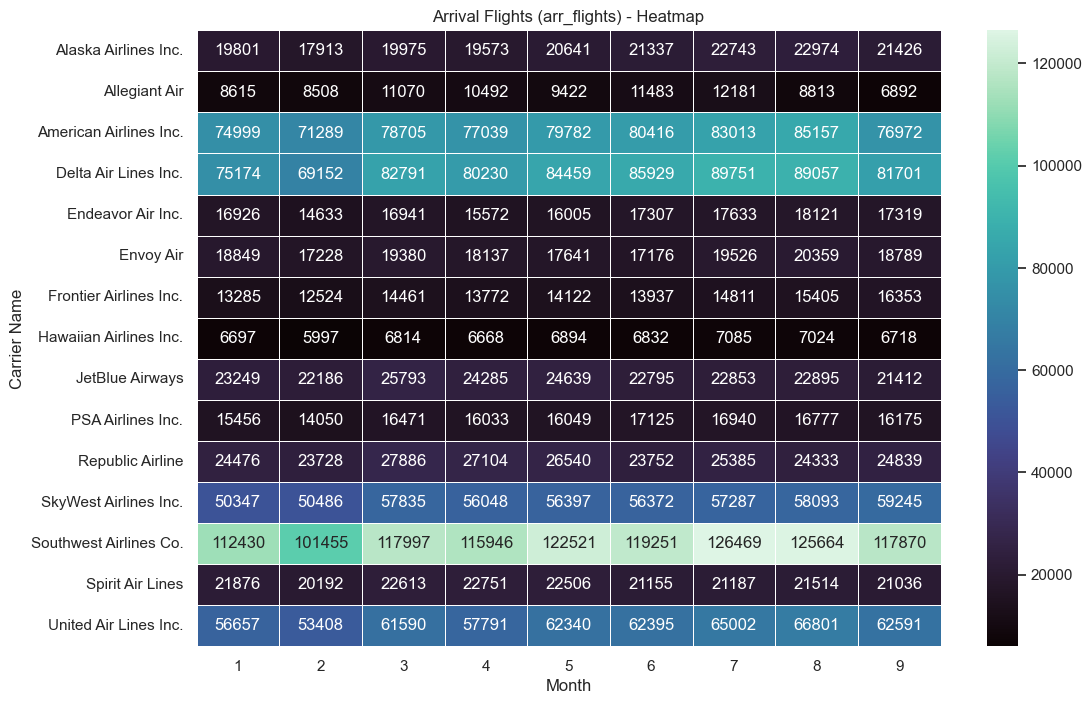

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Aggregate values for duplicate entries
arr_flights_sum = airline_delay.groupby(['carrier_name', 'month'])['arr_flights'].sum()

# Pivot the data for heatmap
heatmap_data_arr_flights = arr_flights_sum.reset_index().pivot(index='carrier_name', columns='month', values='arr_flights')

# Set the style of seaborn
sns.set(style="whitegrid")

# Heatmap for arr_flights
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_arr_flights, cmap='mako', annot=True, fmt=".0f", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Carrier Name')
plt.title('Arrival Flights (arr_flights) - Heatmap')

plt.show()


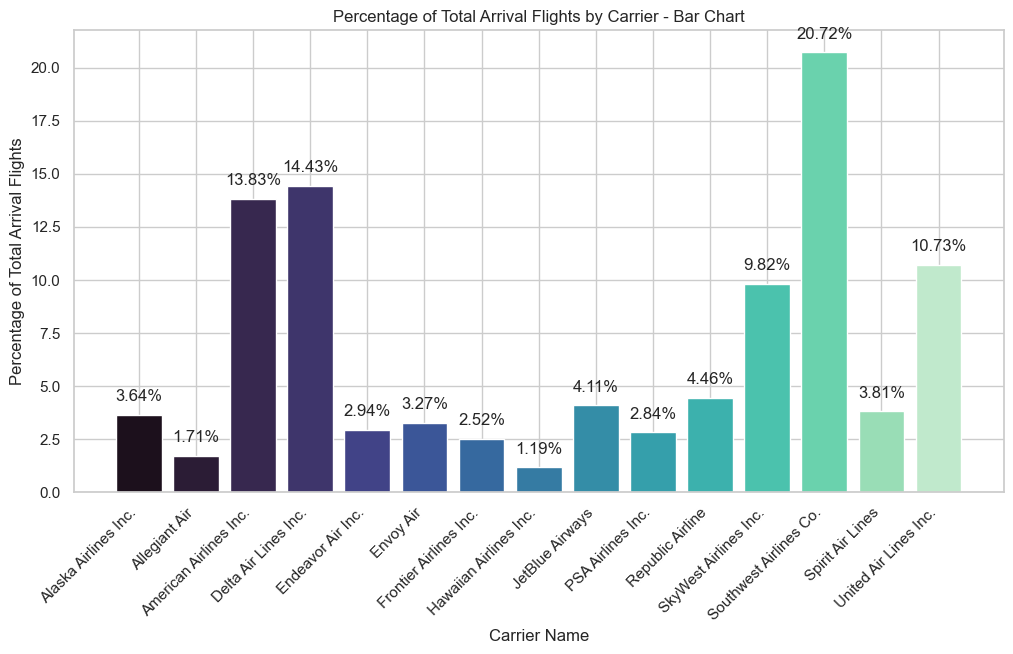

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Aggregate values for duplicate entries
arr_flights_sum = airline_delay.groupby('carrier_name')['arr_flights'].sum()

# Calculate the total number of arrival flights
total_arr_flights = arr_flights_sum.sum()

# Calculate the percentage of total arrival flights for each carrier
arr_flights_percent = (arr_flights_sum / total_arr_flights) * 100

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar chart for arrival flights as a percentage
plt.figure(figsize=(12, 6))
colors = sns.color_palette("mako", len(arr_flights_percent))
bar_plot = plt.bar(arr_flights_percent.index, arr_flights_percent, color=colors)
plt.xlabel('Carrier Name')
plt.ylabel('Percentage of Total Arrival Flights')
plt.title('Percentage of Total Arrival Flights by Carrier - Bar Chart')

# Show the percentage values on the bars
for i, value in enumerate(arr_flights_percent):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


Arr_Del15

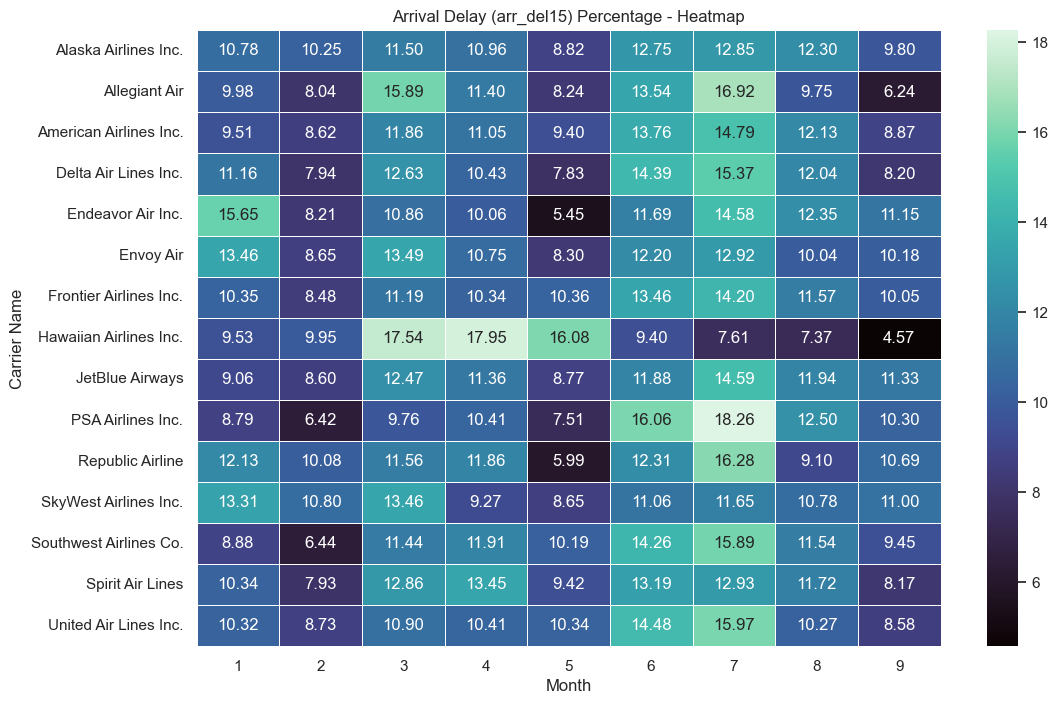

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Aggregate values for duplicate entries
arr_del15_sum = airline_delay.groupby(['carrier_name', 'month'])['arr_del15'].sum()

# Calculate percentage values
percentage_values_heatmap = arr_del15_sum / arr_del15_sum.groupby('carrier_name').transform('sum') * 100

# Pivot the data for heatmap
heatmap_data = percentage_values_heatmap.reset_index().pivot(index='carrier_name', columns='month', values='arr_del15')

# Set the style of seaborn
sns.set(style="whitegrid")

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='mako', annot=True, fmt=".2f", linewidths=.5)
plt.xlabel('Month')
plt.ylabel('Carrier Name')
plt.title('Arrival Delay (arr_del15) Percentage - Heatmap')

plt.show()


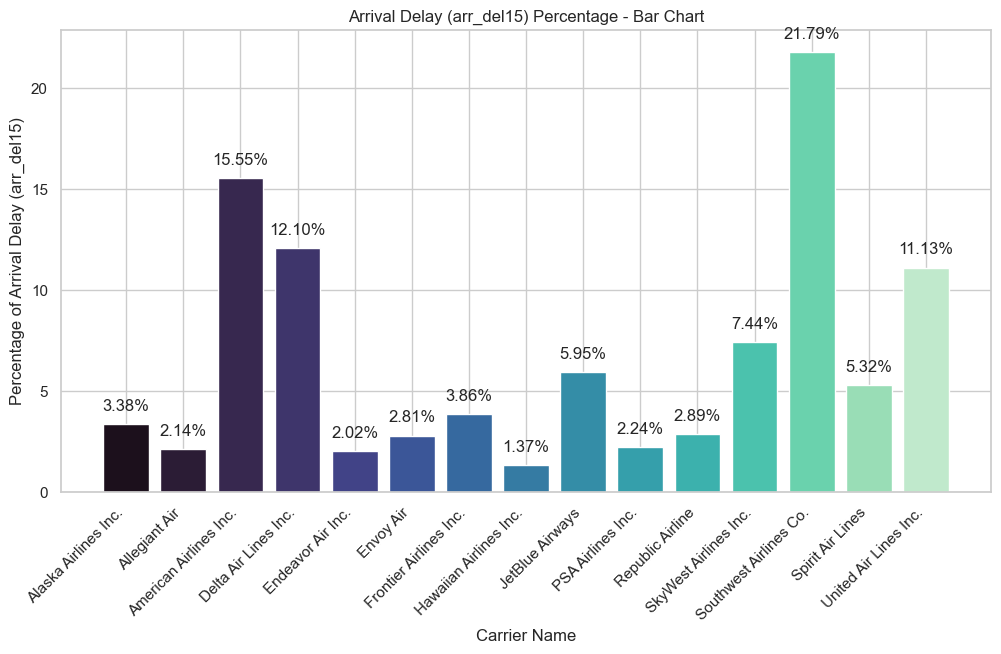

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# Aggregate values for duplicate entries
arr_del15_sum = airline_delay.groupby('carrier_name')['arr_del15'].sum()

# Calculate percentage values
percentage_values_bar = arr_del15_sum / arr_del15_sum.sum() * 100

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar chart
plt.figure(figsize=(12, 6))
colors = sns.color_palette("mako", len(percentage_values_bar))
bar_plot = plt.bar(percentage_values_bar.index, percentage_values_bar, color=colors)
plt.xlabel('Carrier Name')
plt.ylabel('Percentage of Arrival Delay (arr_del15)')
plt.title('Arrival Delay (arr_del15) Percentage - Bar Chart')

# Show the values on the bars
for i, value in enumerate(percentage_values_bar):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()


On_Time Air Carrier

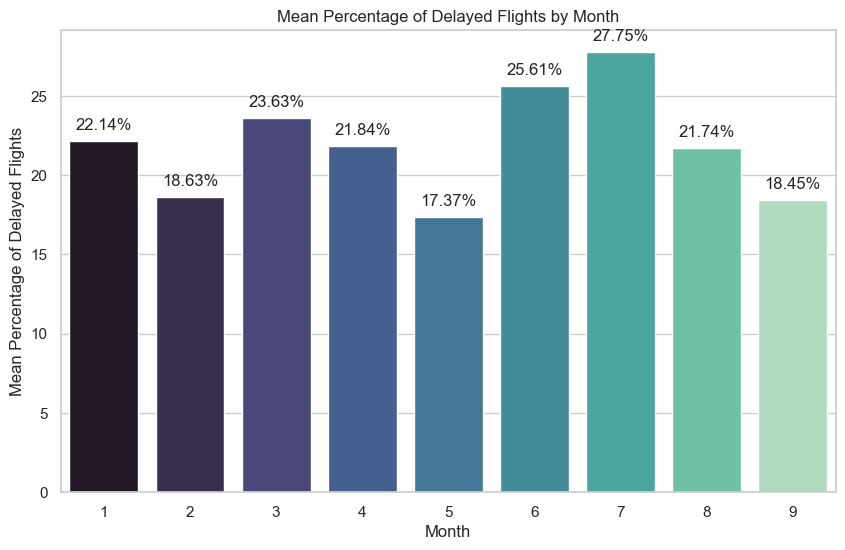

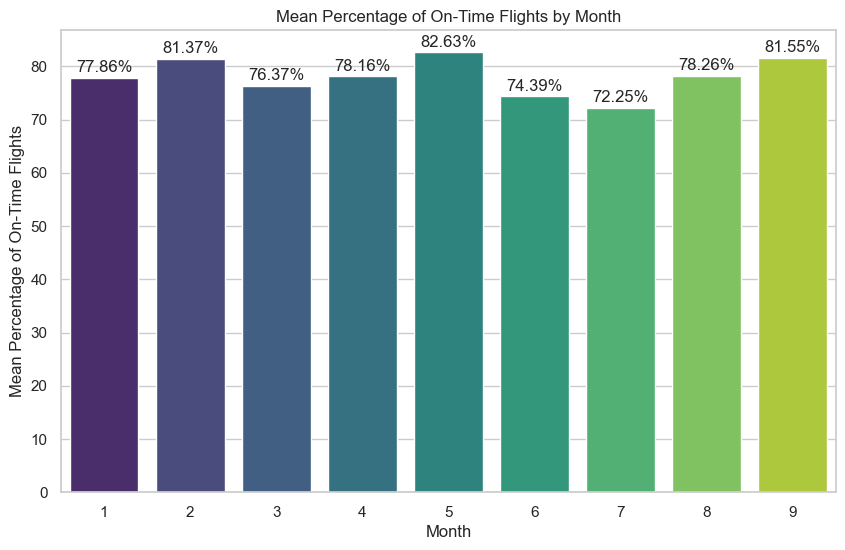

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# a. Calculate the percentage of delayed flights
airline_delay['percentage_delayed'] = (airline_delay['arr_del15'] / airline_delay['arr_flights']) * 100

# Group by month and calculate the mean percentage of delayed flights for each month
monthly_percentage_delayed = airline_delay.groupby('month')['percentage_delayed'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Bar chart for mean percentage delayed flights by month
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='month', y='percentage_delayed', data=monthly_percentage_delayed, palette='mako')
plt.xlabel('Month')
plt.ylabel('Mean Percentage of Delayed Flights')
plt.title('Mean Percentage of Delayed Flights by Month')

# Display the values on top of each bar
for bar, value in zip(bar_plot.patches, monthly_percentage_delayed['percentage_delayed']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{value:.2f}%', ha='center', va='bottom')

# b. Calculate the percentage of on-time flights
airline_delay['percentage_on_time'] = 100 - airline_delay['percentage_delayed']

# Group by month and calculate the mean percentage of on-time flights for each month
monthly_percentage_on_time = airline_delay.groupby('month')['percentage_on_time'].mean().reset_index()

# Bar chart for mean percentage on-time flights by month
plt.figure(figsize=(10, 6))
bar_plot_on_time = sns.barplot(x='month', y='percentage_on_time', data=monthly_percentage_on_time, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Mean Percentage of On-Time Flights')
plt.title('Mean Percentage of On-Time Flights by Month')

# Display the values on top of each bar
for bar, value in zip(bar_plot_on_time.patches, monthly_percentage_on_time['percentage_on_time']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.show()


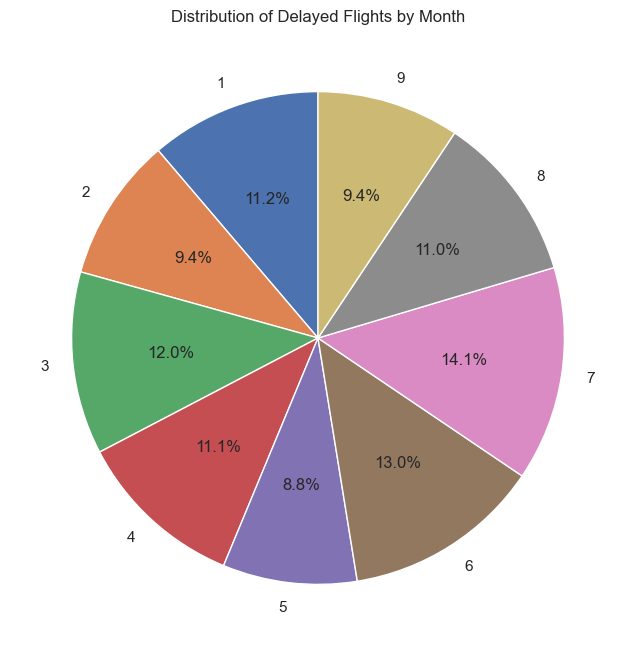

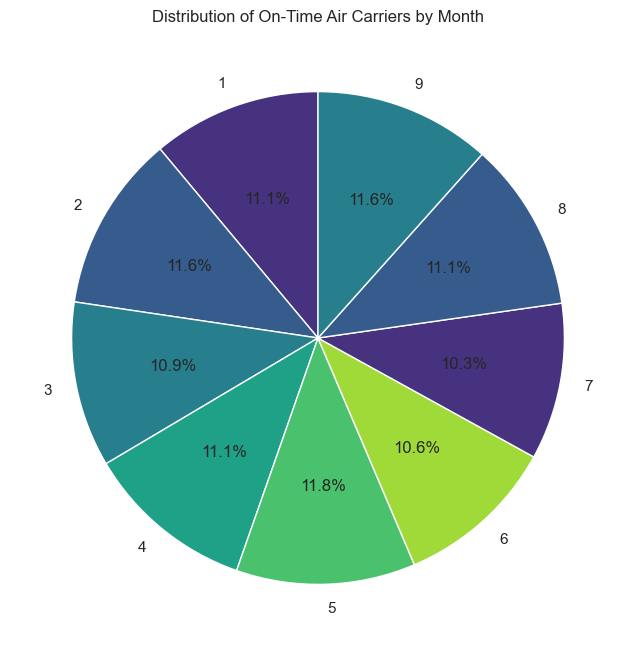

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# a. Calculate the percentage of delayed flights
airline_delay['percentage_delayed'] = (airline_delay['arr_del15'] / airline_delay['arr_flights']) * 100

# Group by month and calculate the mean percentage of delayed flights for each month
monthly_percentage_delayed = airline_delay.groupby('month')['percentage_delayed'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a pie chart for the mean percentage of delayed flights by month
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_percentage_delayed['percentage_delayed'],
    labels=monthly_percentage_delayed['month'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Delayed Flights by Month')
plt.show()

# b. Calculate the percentage of on-time flights
airline_delay['percentage_on_time'] = 100 - airline_delay['percentage_delayed']

# Group by month and calculate the mean percentage of on-time flights for each month
monthly_percentage_on_time = airline_delay.groupby('month')['percentage_on_time'].mean().reset_index()

# Create a pie chart for the mean percentage of on-time flights by month
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_percentage_on_time['percentage_on_time'],
    labels=monthly_percentage_on_time['month'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis')
)
plt.title('Distribution of On-Time Air Carriers by Month')
plt.show()


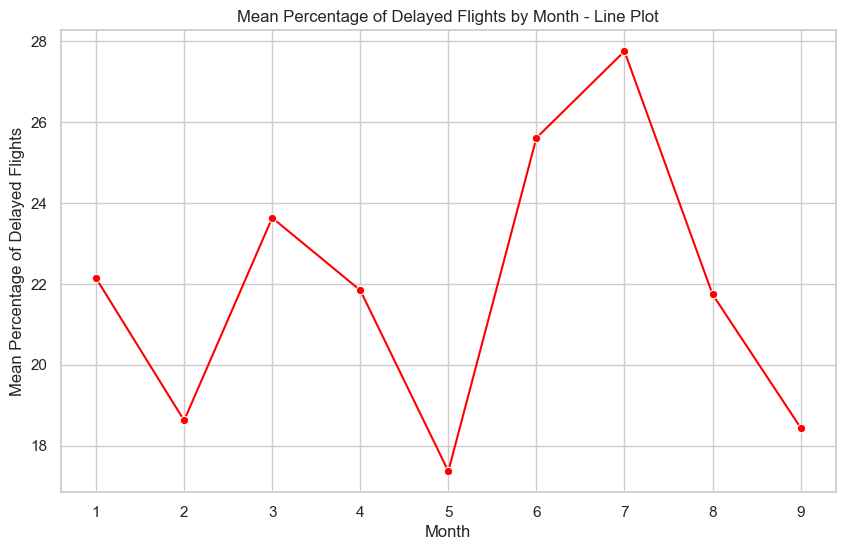

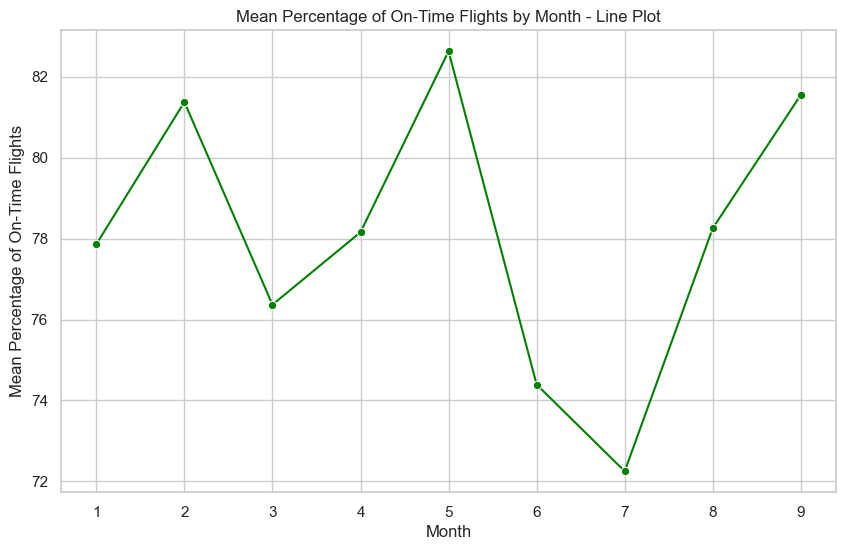

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# a. Calculate the percentage of delayed flights
airline_delay['percentage_delayed'] = (airline_delay['arr_del15'] / airline_delay['arr_flights']) * 100

# Group by month and calculate the mean percentage of delayed flights for each month
monthly_percentage_delayed = airline_delay.groupby('month')['percentage_delayed'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a line plot for mean percentage delayed flights by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='percentage_delayed', data=monthly_percentage_delayed, color='red', marker='o')
plt.xlabel('Month')
plt.ylabel('Mean Percentage of Delayed Flights')
plt.title('Mean Percentage of Delayed Flights by Month - Line Plot')

plt.show()

# b. Calculate the percentage of on-time flights
airline_delay['percentage_on_time'] = 100 - airline_delay['percentage_delayed']

# Group by month and calculate the mean percentage of on-time flights for each month
monthly_percentage_on_time = airline_delay.groupby('month')['percentage_on_time'].mean().reset_index()

# Create a line plot for mean percentage on-time flights by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='percentage_on_time', data=monthly_percentage_on_time, color='green', marker='o')
plt.xlabel('Month')
plt.ylabel('Mean Percentage of On-Time Flights')
plt.title('Mean Percentage of On-Time Flights by Month - Line Plot')

plt.show()


# Air Carrier Delay Percentage Caused by Weather Conditions

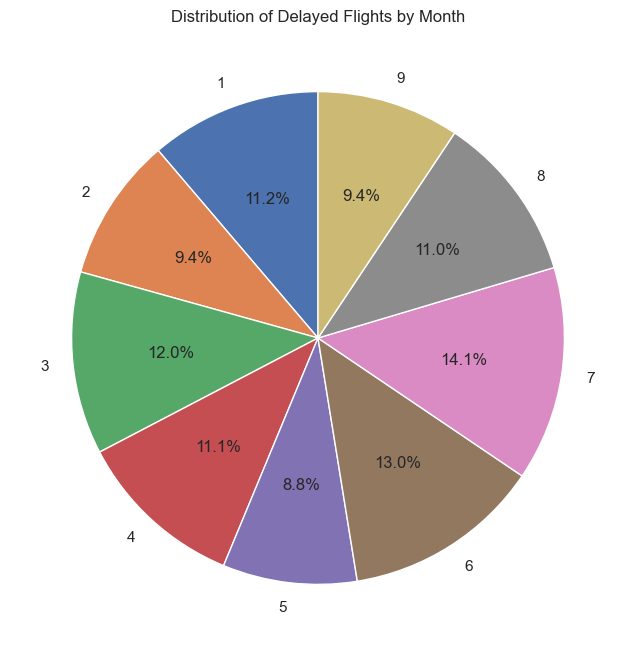

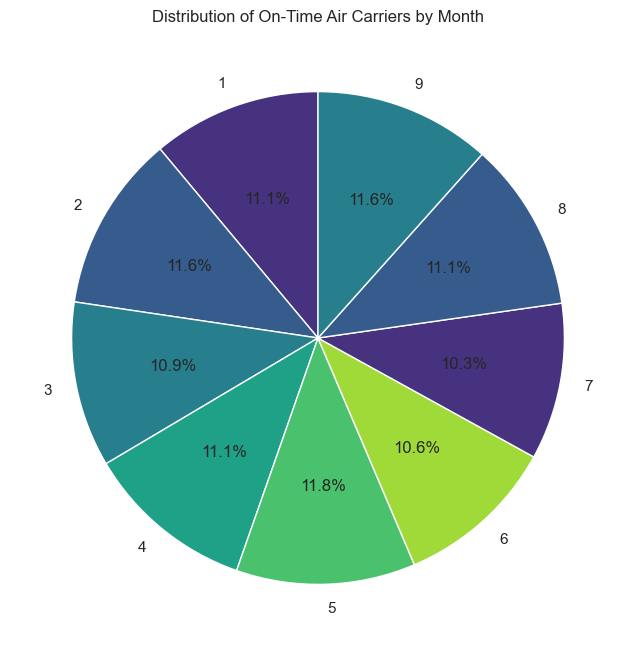

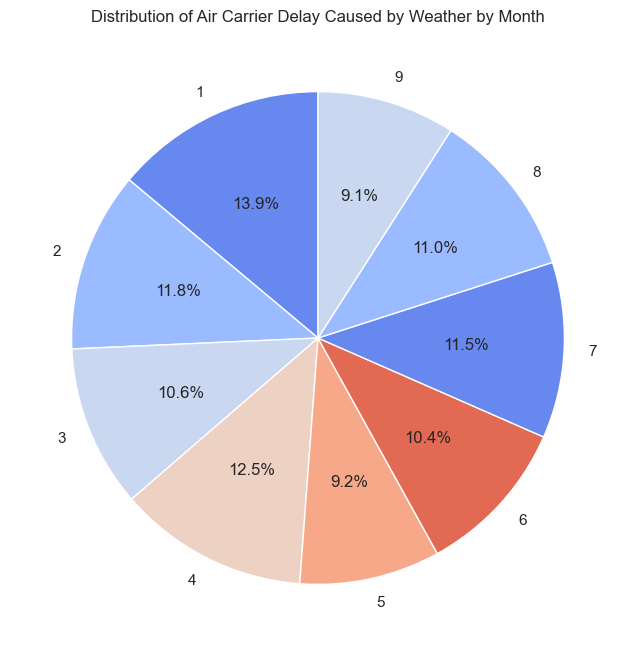

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# a. Calculate the percentage of delayed flights
airline_delay['percentage_delayed'] = (airline_delay['arr_del15'] / airline_delay['arr_flights']) * 100

# Group by month and calculate the mean percentage of delayed flights for each month
monthly_percentage_delayed = airline_delay.groupby('month')['percentage_delayed'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a pie chart for the mean percentage of delayed flights by month
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_percentage_delayed['percentage_delayed'],
    labels=monthly_percentage_delayed['month'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Delayed Flights by Month')
plt.show()

# b. Calculate the percentage of on-time flights
airline_delay['percentage_on_time'] = 100 - airline_delay['percentage_delayed']

# Group by month and calculate the mean percentage of on-time flights for each month
monthly_percentage_on_time = airline_delay.groupby('month')['percentage_on_time'].mean().reset_index()

# Create a pie chart for the mean percentage of on-time flights by month
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_percentage_on_time['percentage_on_time'],
    labels=monthly_percentage_on_time['month'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis')
)
plt.title('Distribution of On-Time Air Carriers by Month')
plt.show()

# c. Calculate the percentage of air carrier delay caused by weather
airline_delay['percentage_weather_delay'] = (airline_delay['weather_delay'] / airline_delay['arr_delay']) * 100

# Group by month and calculate the mean percentage of weather delay for each month
monthly_percentage_weather_delay = airline_delay.groupby('month')['percentage_weather_delay'].mean().reset_index()

# Create a pie chart for the mean percentage of air carrier delay caused by weather by month
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_percentage_weather_delay['percentage_weather_delay'],
    labels=monthly_percentage_weather_delay['month'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('coolwarm')
)
plt.title('Distribution of Air Carrier Delay Caused by Weather by Month')
plt.show()


# Carrier With The Most Flights Every Month

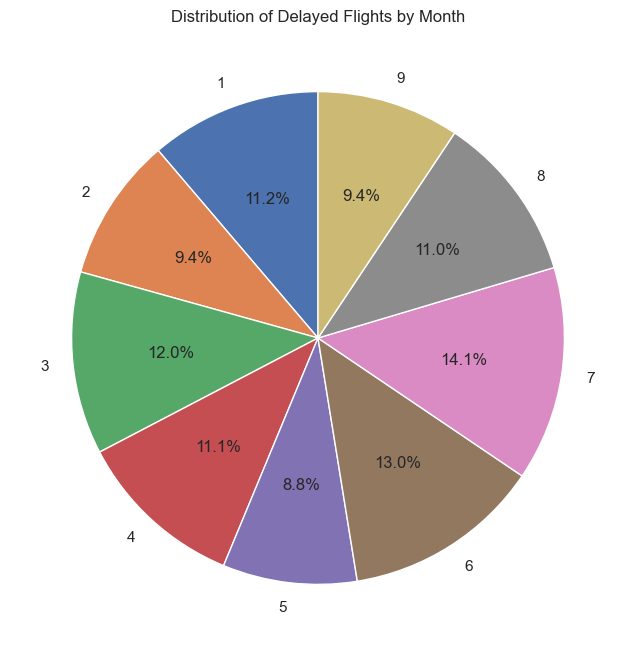

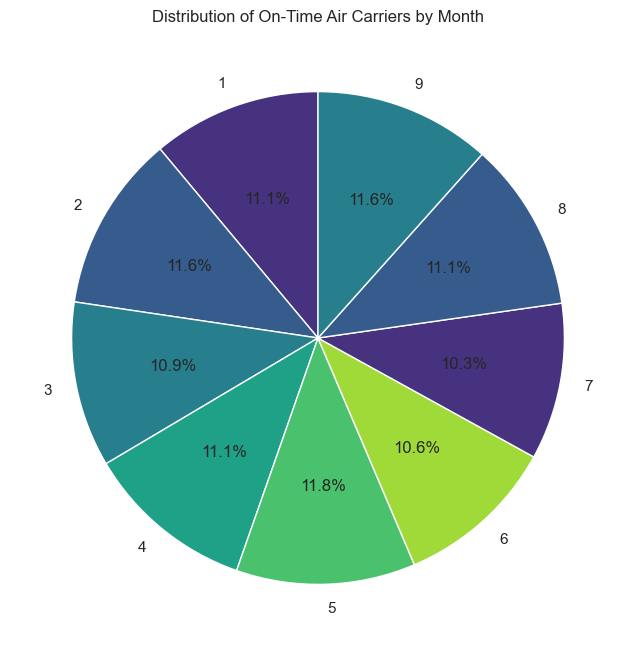

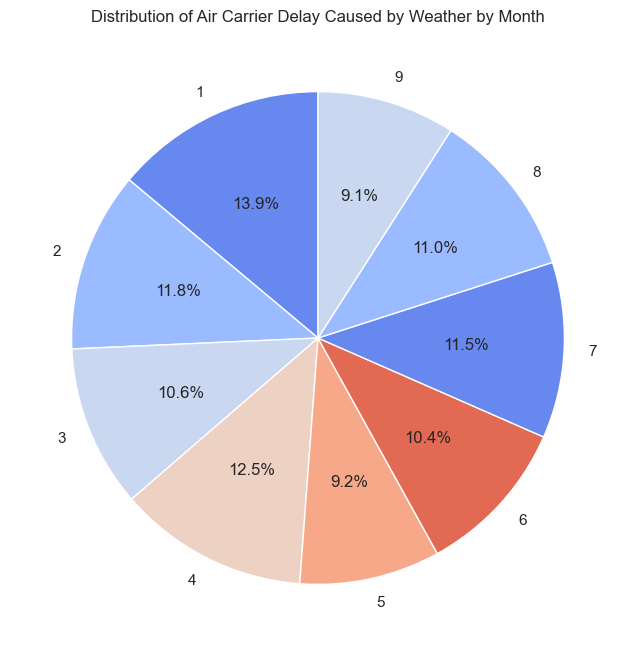

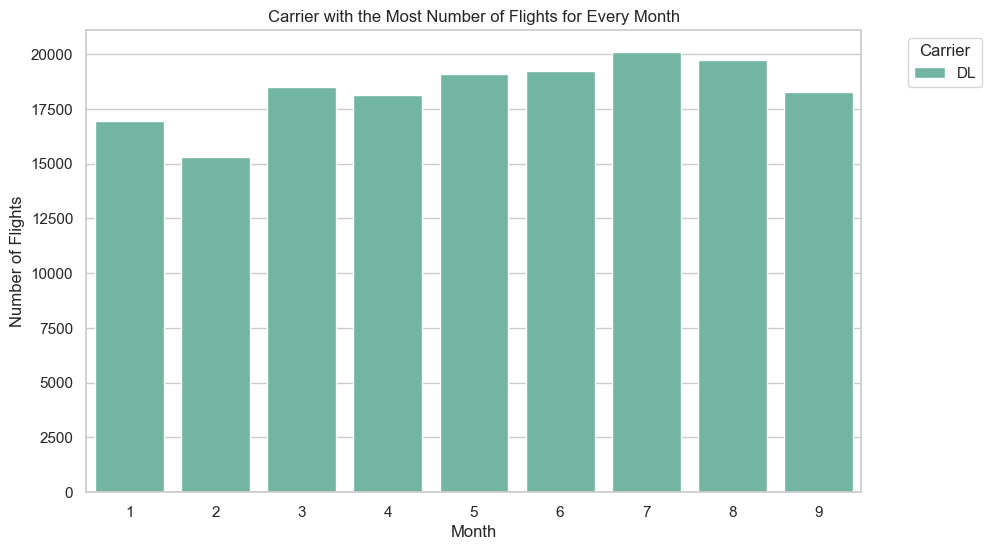

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# a. Calculate the percentage of delayed flights
airline_delay['percentage_delayed'] = (airline_delay['arr_del15'] / airline_delay['arr_flights']) * 100

# Group by month and calculate the mean percentage of delayed flights for each month
monthly_percentage_delayed = airline_delay.groupby('month')['percentage_delayed'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a pie chart for the mean percentage of delayed flights by month
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_percentage_delayed['percentage_delayed'],
    labels=monthly_percentage_delayed['month'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Delayed Flights by Month')
plt.show()

# b. Calculate the percentage of on-time flights
airline_delay['percentage_on_time'] = 100 - airline_delay['percentage_delayed']

# Group by month and calculate the mean percentage of on-time flights for each month
monthly_percentage_on_time = airline_delay.groupby('month')['percentage_on_time'].mean().reset_index()

# Create a pie chart for the mean percentage of on-time flights by month
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_percentage_on_time['percentage_on_time'],
    labels=monthly_percentage_on_time['month'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis')
)
plt.title('Distribution of On-Time Air Carriers by Month')
plt.show()

# c. Calculate the percentage of air carrier delay caused by weather
airline_delay['percentage_weather_delay'] = (airline_delay['weather_delay'] / airline_delay['arr_delay']) * 100

# Group by month and calculate the mean percentage of weather delay for each month
monthly_percentage_weather_delay = airline_delay.groupby('month')['percentage_weather_delay'].mean().reset_index()

# Create a pie chart for the mean percentage of air carrier delay caused by weather by month
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_percentage_weather_delay['percentage_weather_delay'],
    labels=monthly_percentage_weather_delay['month'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('coolwarm')
)
plt.title('Distribution of Air Carrier Delay Caused by Weather by Month')
plt.show()

# d. Carrier with the Most Number of Flights for Every Month
max_flights_carrier = airline_delay.groupby(['year', 'month', 'carrier'])['arr_flights'].max().reset_index()
max_flights_carrier = max_flights_carrier.loc[max_flights_carrier.groupby(['year', 'month'])['arr_flights'].idxmax()]

# Create a bar chart for the carrier with the most number of flights for every month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='arr_flights', hue='carrier', data=max_flights_carrier, palette='Set2')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Carrier with the Most Number of Flights for Every Month')
plt.legend(title='Carrier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Airport With The Most Landed Air Carrier

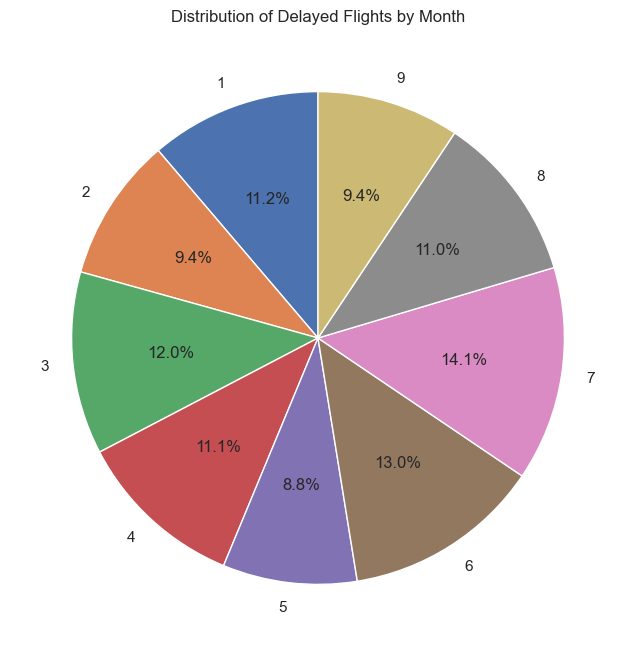

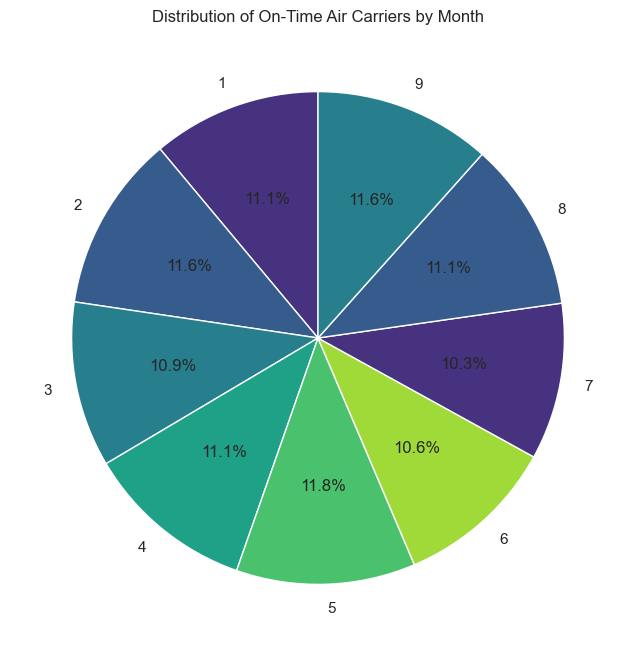

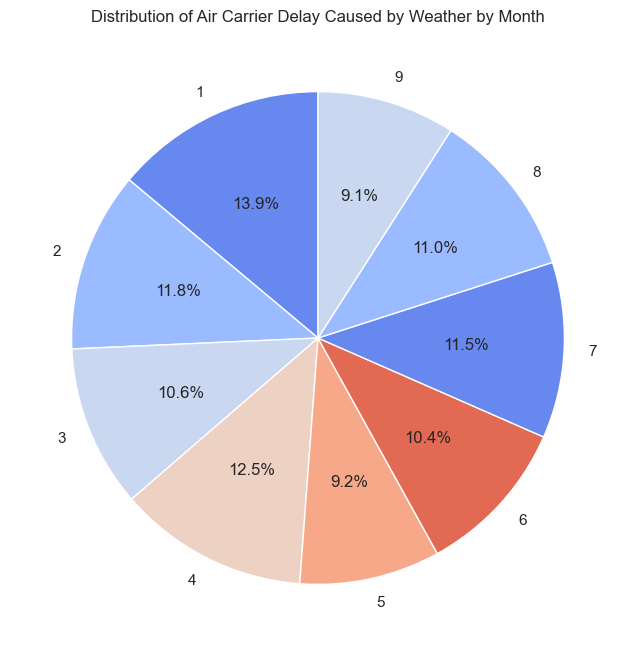

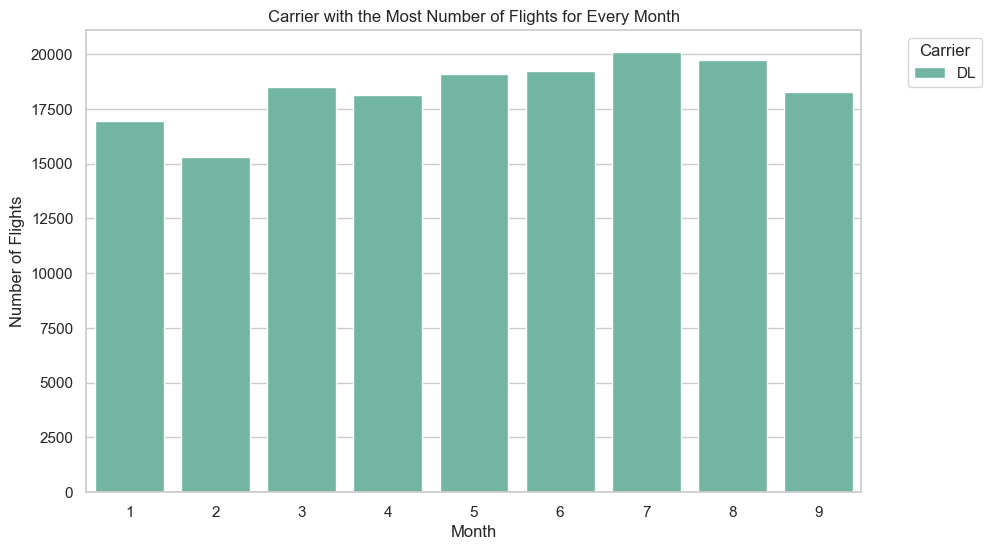

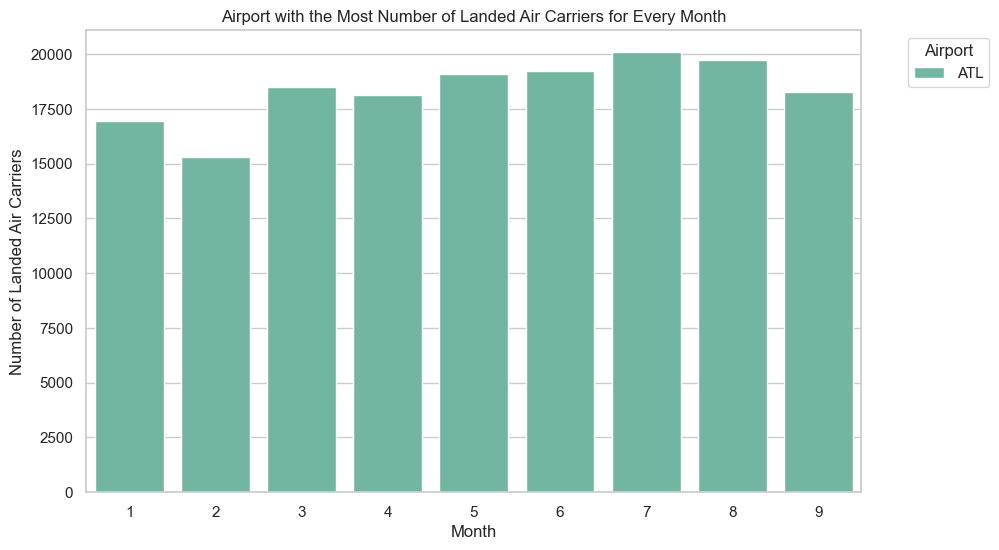

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset into the 'airline_delay' DataFrame

# a. Calculate the percentage of delayed flights
airline_delay['percentage_delayed'] = (airline_delay['arr_del15'] / airline_delay['arr_flights']) * 100

# Group by month and calculate the mean percentage of delayed flights for each month
monthly_percentage_delayed = airline_delay.groupby('month')['percentage_delayed'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a pie chart for the mean percentage of delayed flights by month
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_percentage_delayed['percentage_delayed'],
    labels=monthly_percentage_delayed['month'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Delayed Flights by Month')
plt.show()

# b. Calculate the percentage of on-time flights
airline_delay['percentage_on_time'] = 100 - airline_delay['percentage_delayed']

# Group by month and calculate the mean percentage of on-time flights for each month
monthly_percentage_on_time = airline_delay.groupby('month')['percentage_on_time'].mean().reset_index()

# Create a pie chart for the mean percentage of on-time flights by month
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_percentage_on_time['percentage_on_time'],
    labels=monthly_percentage_on_time['month'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis')
)
plt.title('Distribution of On-Time Air Carriers by Month')
plt.show()

# c. Calculate the percentage of air carrier delay caused by weather
airline_delay['percentage_weather_delay'] = (airline_delay['weather_delay'] / airline_delay['arr_delay']) * 100

# Group by month and calculate the mean percentage of weather delay for each month
monthly_percentage_weather_delay = airline_delay.groupby('month')['percentage_weather_delay'].mean().reset_index()

# Create a pie chart for the mean percentage of air carrier delay caused by weather by month
plt.figure(figsize=(8, 8))
plt.pie(
    monthly_percentage_weather_delay['percentage_weather_delay'],
    labels=monthly_percentage_weather_delay['month'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('coolwarm')
)
plt.title('Distribution of Air Carrier Delay Caused by Weather by Month')
plt.show()

# d. Carrier with the Most Number of Flights for Every Month
max_flights_carrier = airline_delay.groupby(['year', 'month', 'carrier'])['arr_flights'].max().reset_index()
max_flights_carrier = max_flights_carrier.loc[max_flights_carrier.groupby(['year', 'month'])['arr_flights'].idxmax()]

# Create a bar chart for the carrier with the most number of flights for every month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='arr_flights', hue='carrier', data=max_flights_carrier, palette='Set2')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Carrier with the Most Number of Flights for Every Month')
plt.legend(title='Carrier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# e. Airport with the Most Number of Landed Air Carrier Every Month
max_landed_airport = airline_delay.groupby(['year', 'month', 'airport'])['arr_flights'].max().reset_index()
max_landed_airport = max_landed_airport.loc[max_landed_airport.groupby(['year', 'month'])['arr_flights'].idxmax()]

# Create a bar chart for the airport with the most number of landed air carriers for every month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='arr_flights', hue='airport', data=max_landed_airport, palette='Set2')
plt.xlabel('Month')
plt.ylabel('Number of Landed Air Carriers')
plt.title('Airport with the Most Number of Landed Air Carriers for Every Month')
plt.legend(title='Airport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
